<a href="https://colab.research.google.com/github/mhtattersall/LLM/blob/main/GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# PDFplumber is a Python library that provides tools to extract information from PDF files
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.4 MB/s eta 0:00:00


In [4]:
# Pytesseract is a Python wrapper for Google's Tesseract-OCR Engine, which is an open-source optical character recognition (OCR) tool
!pip install pytesseract

In [8]:
import pdfplumber
from PIL import Image # PIL (Python Imaging Library) module is used for opening, manipulating, and saving many different image file formats
import pytesseract

# Path to the PDF file
pdf_path = '/content/sample_data/PSF.pdf'

# Open the PDF file
with pdfplumber.open(pdf_path) as pdf:
    # Initialize an empty list to store PIL image objects
    pdf_images = []

    # Iterate over each page
    for page_num in range(len(pdf.pages)):
        # Access each page
        page = pdf.pages[page_num]

        # Render the page to an image (PIL Image)
        pil_image = page.to_image(resolution=300).original

        # Append the PIL image to the list
        pdf_images.append(pil_image)

# Print the number of pages converted
print("Number of pages:", len(pdf_images))

Number of pages: 4


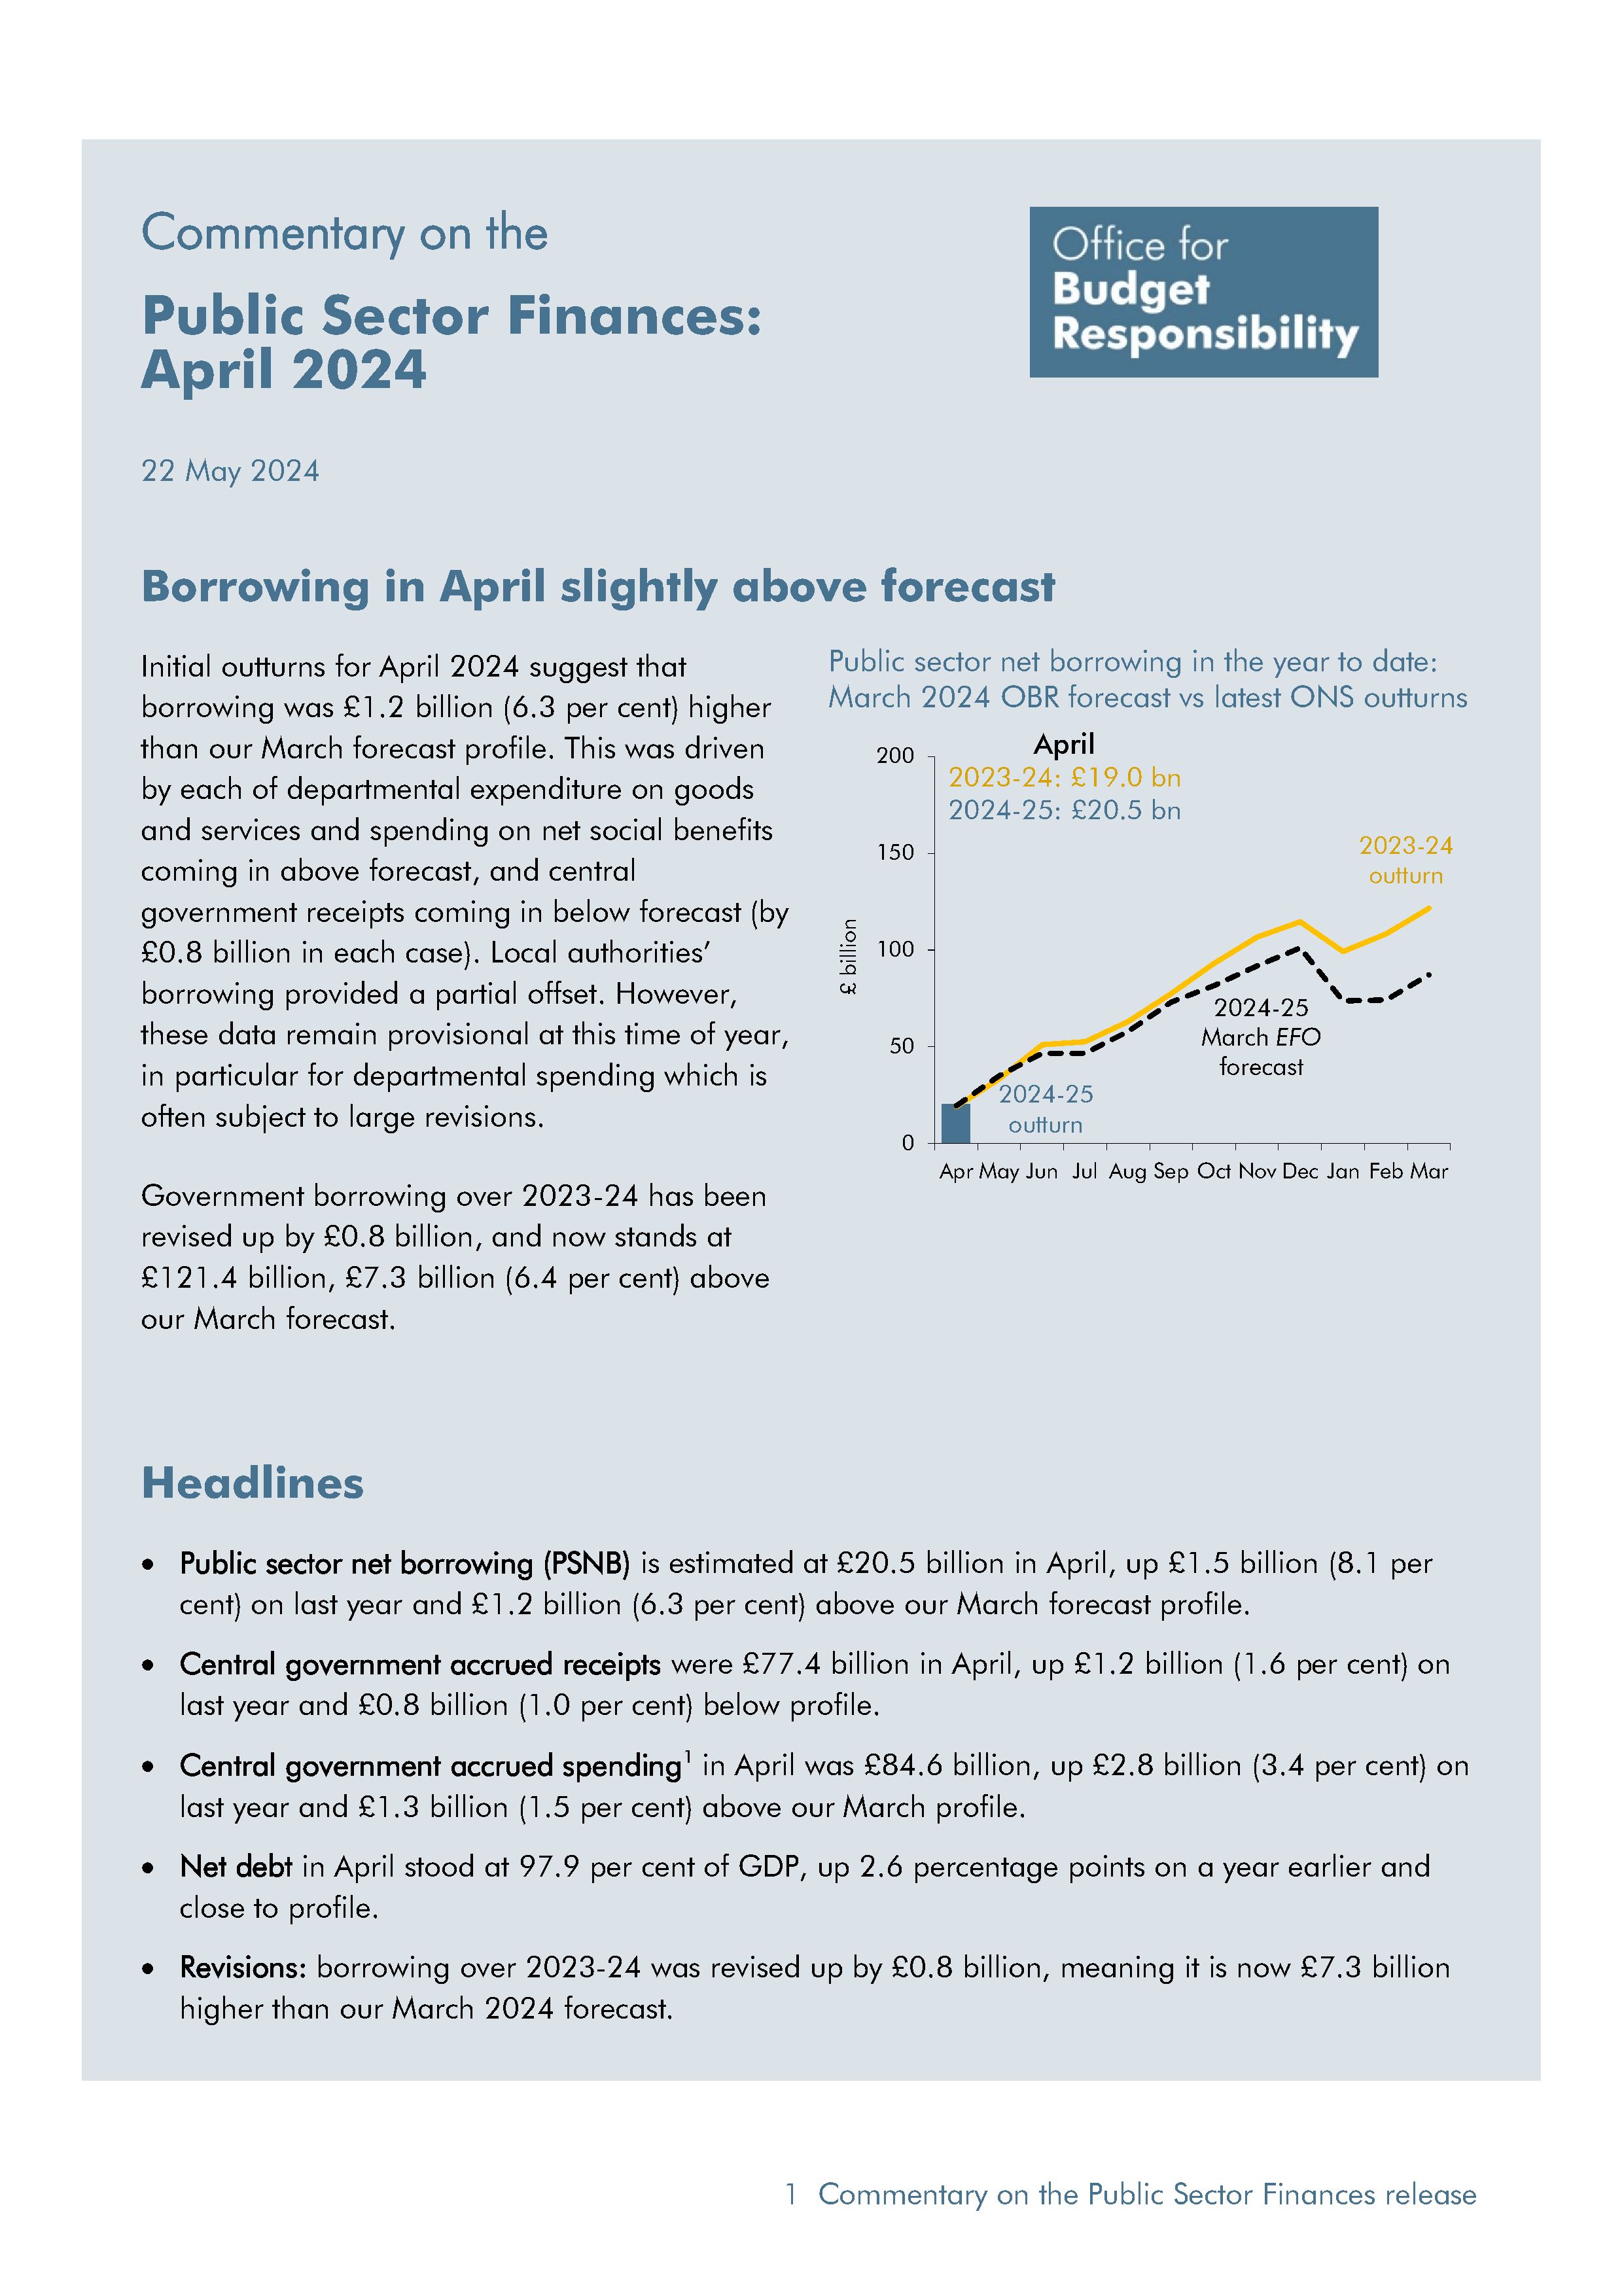

In [18]:
# view the first page (at index 0 of the list)
pdf_images[0]

In [9]:
# Install the Tesseract-OCR package along with the required dependencies
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,910 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [10]:
# Install the English language data for Tesseract-OCR
!apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [19]:
# Perform OCR using pytesseract on first page of pdf
doc_txt = []
text = pytesseract.image_to_string(pdf_images[0])
doc_txt.append(text)
print(doc_txt)

Text from page 3:
['Commentary on the\n\nPublic Sector Finances:\nApril 2024\n\n22 May 2024\n\nOffice for\nBudget\n\nResponsibility\n\n \n\nBorrowing in April slightly above forecast\n\nInitial outturns for April 2024 suggest that\nborrowing was £1.2 billion (6.3 per cent) higher\nthan our March forecast profile. This was driven\nby each of departmental expenditure on goods\nand services and spending on net social benefits\ncoming in above forecast, and central\ngovernment receipts coming in below forecast (by\n£0.8 billion in each case). Local authorities’\nborrowing provided a partial oftset. However,\nthese data remain provisional at this time of year,\nin particular for departmental spending which is\notten subject to large revisions.\n\nGovernment borrowing over 2023-24 has been\nrevised up by £0.8 billion, and now stands at\n£121.4 billion, £7.3 billion (6.4 per cent) above\nour March forecast.\n\nHeadlines\n\nPublic sector net borrowing in the year to date:\nMarch 2024 OBR forec

In [20]:
import pickle # allows you to save data structures and load them back later
# Save the list to a file
with open('doc_txt.pkl', 'wb') as file:
    pickle.dump(doc_txt, file)
#with open('data/doc_txt.pkl', 'rb') as file:
#    doc_txt = pickle.load(file)